# Analysis of the results for experiment 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

def strip_time(text):
    return text[:6].strip()

def make_int(text):
    return int(text.strip())

def make_float(text):
    return float(text.strip())

dtypes = {'Dataset': 'category',
          'Aug': 'category',
          'Seed': np.int32,
          'NumLayers': np.int32,
          'BestEpoch': np.int32,
          'TestAcc': np.float64,
          'TestLoss': np.float64,
          'ValAcc': np.float64,
          'ValLoss': np.float64,
          'Device': 'category',
          'Time': np.float64
          }

converters = {'Dataset': strip,
          'Aug': strip,
          'Seed': make_int,
          'NumLayers': make_int,
          'BestEpoch': make_int,
          'TestAcc': make_float,
          'TestLoss': make_float,
          'ValAcc': make_float,
          'ValLoss': make_float,
          'Device': strip,
          'Time': strip_time
          }

In [4]:
results = pd.read_csv('../results/train_log_exp7.csv', header=0, converters=converters)
columns = [x.strip() if x!=' Model' else 'CorruptionRate' for x in list(dtypes.keys())]
results.columns = columns
results['Time'] = results['Time'].astype('float64')

In [5]:
results.head()

,Dataset,Aug,Seed,NumLayers,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,Device,Time
0,IMDB-BINARY,Vanilla,1314,2,1,0.710,0.5804,0.67,0.5789,cuda,12.73
1,IMDB-BINARY,G-Mixup,1314,2,7,0.745,0.5109,0.67,0.5744,cuda,13.42
2,IMDB-BINARY,DropEdge,1314,2,133,0.720,0.6165,0.71,0.8124,cuda,34.82
3,IMDB-BINARY,Vanilla,11314,2,18,0.710,0.4889,0.73,0.6064,cuda,12.29
4,IMDB-BINARY,G-Mixup,11314,2,34,0.715,0.5120,0.76,0.5482,cuda,13.53


In [6]:
grouped = results.drop(['Device'], axis=1).groupby(['Dataset', 'Aug', 'NumLayers']).agg([np.mean, np.std, np.count_nonzero]).loc[:, ['TestAcc', 'Time']]
grouped

TestAcc                              Time  \
                                      mean       std count_nonzero      mean   
Dataset       Aug      NumLayers                                               
IMDB-BINARY   DropEdge 2          0.707500  0.025083            10   33.8650   
                       3          0.714500  0.034597            10   37.2550   
                       4          0.719000  0.023547            10   35.0750   
                       5          0.722500  0.032339            10   36.5630   
                       6          0.700000  0.026754            20   37.6730   
                       7          0.690000  0.032318            10   38.9280   
                       8          0.690000  0.036742            10   40.1170   
                       9          0.687500  0.030023            10   41.2810   
              G-Mixup  2          0.714000  0.026957            10   13.5900   
                       3          0.721500  0.026146            10   16.4410   
                       4          0.715500  0.026294            10   16.2520   
                       5          0.713500  0.034484            10   17.6910   
                       6          0.708250  0.034613            20   19.0530   
                       7          0.697500  0.020716            10   20.4470   
                       8          0.690500  0.019358            10   21.8220   
                       9          0.686000  0.028655            10   23.1380   
              Vanilla  2          0.701500  0.024726            10   11.9660   
                       3          0.730000  0.027183            10   14.7480   
                       4          0.720000  0.031623            10   14.3590   
                       5          0.707000  0.031109            10   15.6380   
                       6          0.709250  0.026669            20   16.8555   
                       7          0.692000  0.019032            10   18.1170   
                       8          0.688500  0.023927            10   19.3160   
                       9          0.688000  0.046260            10   20.5190   
REDDIT-BINARY DropEdge 2          0.854750  0.015787            10   89.9010   
                       3          0.868250  0.023454            10  101.8730   
                       4          0.832250  0.044087            10  113.7890   
                       5          0.798000  0.047665            10  125.3020   
                       6          0.802125  0.054636            20  137.2230   
                       7          0.756250  0.047817            10  149.1860   
                       8          0.684250  0.103240            10  163.2610   
                       9          0.593000  0.111285            10  172.9830   
              G-Mixup  2          0.860500  0.013984            10   68.2380   
                       3          0.856750  0.027337            10   81.3280   
                       4          0.837000  0.043378            10   94.5910   
                       5          0.820750  0.054582            10  107.6140   
                       6          0.805750  0.055192            20  120.6185   
                       7          0.774250  0.068324            10  133.9330   
                       8          0.729750  0.053793            10  148.6050   
                       9          0.627000  0.083531            10  160.4020   
              Vanilla  2          0.860250  0.017258            10   46.9090   
                       3          0.849000  0.036117            10   58.8810   
                       4          0.821000  0.067476            10   70.7020   
                       5          0.798250  0.051654            10   82.5050   
                       6          0.784000  0.044199            20   94.4310   
                       7          0.753750  0.062129            10  106.3160   
                       8          0.712250  0.088124            10  119.5460   
                       9          0

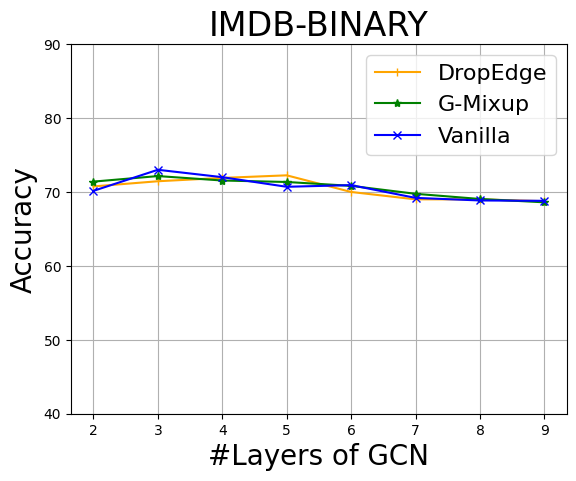

In [6]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.grid(0.7)
ax.plot([x[2] for x in grouped.index][:8], grouped.iloc[:8, 0] * 100, '-', marker='|', color='orange', label='DropEdge')
ax.plot([x[2] for x in grouped.index][:8], grouped.iloc[8:16, 0] * 100, 'g-*', label='G-Mixup')
ax.plot([x[2] for x in grouped.index][:8], grouped.iloc[16:24, 0] * 100, 'b-x', label='Vanilla')
ax.set_ylim(40.0, 90.0)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_xlabel('#Layers of GCN', fontsize=20)
ax.set_title('IMDB-BINARY', fontsize=24)
ax.legend(fontsize=16)
plt.savefig('../fig/imdb-binary-exp7.png', facecolor='white', bbox_inches='tight')

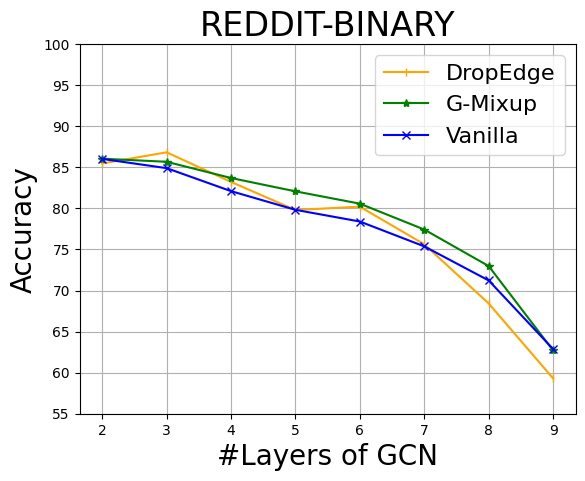

In [7]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.grid(0.7)
ax.plot([x[2] for x in grouped.index][:8], grouped.iloc[24:32, 0] * 100, '-', marker='|', color='orange', label='DropEdge')
ax.plot([x[2] for x in grouped.index][:8], grouped.iloc[32:40, 0] * 100, 'g-*', label='G-Mixup')
ax.plot([x[2] for x in grouped.index][:8], grouped.iloc[40:48, 0] * 100, 'b-x', label='Vanilla')
ax.set_ylim(55.0, 100.0)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_xlabel('#Layers of GCN', fontsize=20)
ax.set_title('REDDIT-BINARY', fontsize=24)
ax.legend(fontsize=16)
plt.savefig('../fig/reddit-binary-exp7.png', facecolor='white', bbox_inches='tight')

# Total GPU Hours

In [7]:
grouped = results.groupby(['Device']).agg([np.sum]).loc[:,['Time']] / (60*60)
grouped

,Time
,sum
Device,
cuda,10.236142
